# Here we attempt to merge classification differences between Android and Apple as they have a different encoding when doing recordings.

# Plus we look at each features distribution to find anomalies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

import sys
sys.path.insert(1, './utils/')
import util_michael as um
import util

pd.options.display.max_rows = 4000

filename = '../masters/prelim master_Aug 5'

In [2]:
rawdf = pd.read_csv(filename+'.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,28,49,69,70,71,72,73,74,75,88,99,101,131,136,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rawdf.shape

(71130, 142)

In [4]:
rawdf.columns.tolist()

['Unnamed: 0',
 'timestamp_from',
 'timestamp_to',
 'device_id',
 'accelerometer.accuracy',
 'accelerometer.double_values_0',
 'accelerometer.double_values_1',
 'accelerometer.double_values_2',
 'accelerometer.values_considered',
 'battery.battery_adaptor',
 'battery.battery_health',
 'battery.battery_level',
 'battery.battery_scale',
 'battery.battery_status',
 'battery.battery_technology',
 'battery.battery_temperature',
 'battery.battery_voltage',
 'battery.values_considered',
 'battery_charges.battery_end',
 'battery_charges.battery_start',
 'battery_charges.double_end_timestamp',
 'battery_charges.values_considered',
 'battery_discharges.battery_end',
 'battery_discharges.battery_start',
 'battery_discharges.double_end_timestamp',
 'battery_discharges.values_considered',
 'calls.call_duration',
 'calls.call_type',
 'calls.trace',
 'calls.values_considered',
 'gyroscope.accuracy',
 'gyroscope.double_values_0',
 'gyroscope.double_values_1',
 'gyroscope.double_values_2',
 'gyroscope.

## Comment columns to keep, the rest will be dropped

In [5]:
cols_to_drop = [
 'Unnamed: 0',
#  'timestamp_from',
#  'timestamp_to',
#  'device_id',
    
 'accelerometer.accuracy',
#  'accelerometer.double_values_0',
#  'accelerometer.double_values_1',
#  'accelerometer.double_values_2',
#  'accelerometer.values_considered',
    
 'battery.battery_adaptor',
 'battery.battery_health',
#  'battery.battery_level',
 'battery.battery_scale',
 'battery.battery_status',
 'battery.battery_technology',
 'battery.battery_temperature',
 'battery.battery_voltage',
#  'battery.values_considered',
    
 'battery_charges.battery_end',
 'battery_charges.battery_start',
 'battery_charges.double_end_timestamp',
 'battery_charges.values_considered',
    
 'battery_discharges.battery_end',
 'battery_discharges.battery_start',
 'battery_discharges.double_end_timestamp',
 'battery_discharges.values_considered',
    
#  'calls.call_duration',
#  'calls.call_type',
 'calls.trace',
#  'calls.values_considered',
    
 'gyroscope.accuracy',
#  'gyroscope.double_values_0',
#  'gyroscope.double_values_1',
#  'gyroscope.double_values_2',
#  'gyroscope.values_considered',
    
 'linear_accelerometer.accuracy',
#  'linear_accelerometer.double_values_0',
#  'linear_accelerometer.double_values_1',
#  'linear_accelerometer.double_values_2',
#  'linear_accelerometer.values_considered',
    
 'locations.accuracy',
 'locations.double_altitude',
 'locations.double_bearing',
 'locations.double_latitude',
 'locations.double_longitude',
 'locations.double_speed',
 'locations.provider',
 'locations.values_considered',
 'locations_visit.accuracy',
 'locations_visit.address',
 'locations_visit.double_arrival',
 'locations_visit.double_departure',
 'locations_visit.double_latitude',
 'locations_visit.double_longitude',
 'locations_visit.name',
 'locations_visit.provider',
 'locations_visit.values_considered',
    
 'plugin_ambient_noise.blob_raw',
 'plugin_ambient_noise.double_decibels',
 'plugin_ambient_noise.double_frequency',
 'plugin_ambient_noise.double_rms',
 'plugin_ambient_noise.double_silence_threshold',
#  'plugin_ambient_noise.is_silent',
#  'plugin_ambient_noise.values_considered',
    
#  'plugin_device_usage.double_elapsed_device_off',
#  'plugin_device_usage.double_elapsed_device_on',
 'plugin_device_usage.elapsed_device_off',
 'plugin_device_usage.elapsed_device_on',
#  'plugin_device_usage.values_considered',
    
 'plugin_google_activity_recognition.Unnamed: 10',
 'plugin_google_activity_recognition.Unnamed: 11',
 'plugin_google_activity_recognition.Unnamed: 7',
 'plugin_google_activity_recognition.Unnamed: 8',
 'plugin_google_activity_recognition.Unnamed: 9',
 'plugin_google_activity_recognition.activities',
#  'plugin_google_activity_recognition.activity_name',
 'plugin_google_activity_recognition.activity_type',
#  'plugin_google_activity_recognition.confidence',
#  'plugin_google_activity_recognition.values_considered',
    
#  'plugin_ios_activity_recognition.activities',
 'plugin_ios_activity_recognition.automotive',
#  'plugin_ios_activity_recognition.confidence',
 'plugin_ios_activity_recognition.cycling',
 'plugin_ios_activity_recognition.running',
 'plugin_ios_activity_recognition.stationary',
 'plugin_ios_activity_recognition.unknown',
#  'plugin_ios_activity_recognition.values_considered',
 'plugin_ios_activity_recognition.walking',
    
#  'plugin_openweather.city',
#  'plugin_openweather.cloudiness',
#  'plugin_openweather.humidity',
#  'plugin_openweather.pressure',
#  'plugin_openweather.rain',
#  'plugin_openweather.snow',
#  'plugin_openweather.sunrise',
#  'plugin_openweather.sunset',
#  'plugin_openweather.temperature',
#  'plugin_openweather.temperature_max',
#  'plugin_openweather.temperature_min',
#  'plugin_openweather.unit',
#  'plugin_openweather.values_considered',
#  'plugin_openweather.weather_description',
 'plugin_openweather.weather_icon_id',
#  'plugin_openweather.wind_degrees',
#  'plugin_openweather.wind_speed',
    
 'plugin_studentlife_audio.blob_feature',
 'plugin_studentlife_audio.datatype',
 'plugin_studentlife_audio.double_convo_end',
 'plugin_studentlife_audio.double_convo_start',
 'plugin_studentlife_audio.double_energy',
 'plugin_studentlife_audio.inference',
 'plugin_studentlife_audio.values_considered',
 'plugin_studentlife_audio_android.blob_feature',
 'plugin_studentlife_audio_android.datatype',
 'plugin_studentlife_audio_android.double_convo_end',
 'plugin_studentlife_audio_android.double_convo_start',
 'plugin_studentlife_audio_android.double_energy',
#  'plugin_studentlife_audio_android.inference',
#  'plugin_studentlife_audio_android.values_considered',
    
 'proximity.accuracy',
 'proximity.double_proximity',
 'proximity.values_considered',
    
 'rotation.accuracy',
#  'rotation.double_values_0',
#  'rotation.double_values_1',
#  'rotation.double_values_2',
#  'rotation.double_values_3',
#  'rotation.values_considered',
    
#  'screen.screen_status',
#  'screen.values_considered',
    
 'sensor_wifi.bssid',
 'sensor_wifi.mac_address',
#  'sensor_wifi.ssid',
#  'sensor_wifi.values_considered',
    
 'significant.is_moving',
 'significant.values_considered',
    
 'wifi.bssid',
 'wifi.frequency',
 'wifi.rssi',
 'wifi.security',
 'wifi.ssid',
 'wifi.values_considered'
]
print('Columns to be dropped:', len(cols_to_drop))

Columns to be dropped: 84


In [6]:
df = rawdf.drop(columns=cols_to_drop)

In [7]:
df.shape, rawdf.shape

((71130, 58), (71130, 142))

In [8]:
cols_to_drop = []

---

## Check missing values

In [9]:
missings = util.summary_missing_data(df)
missings

Count   Percent
plugin_google_activity_recognition.activity_name    71117  0.999817
plugin_google_activity_recognition.confidence       71117  0.999817
plugin_google_activity_recognition.values_consi...  71117  0.999817
plugin_ambient_noise.is_silent                      71106  0.999663
plugin_ambient_noise.values_considered              71106  0.999663
calls.call_type                                     71082  0.999325
calls.call_duration                                 71082  0.999325
calls.values_considered                             71082  0.999325
plugin_studentlife_audio_android.inference          71080  0.999297
plugin_studentlife_audio_android.values_considered  71080  0.999297
plugin_openweather.temperature                      70890  0.996626
plugin_openweather.cloudiness                       70890  0.996626
plugin_openweather.humidity                         70890  0.996626
plugin_openweather.pressure                         70890  0.996626
plugin_openweather.city                             70890  0.996626
plugin_openweather.snow                             70890  0.996626
plugin_openweather.sunrise                          70890  0.996626
plugin_openweather.sunset                           70890  0.996626
plugin_openweather.rain                             70890  0.996626
plugin_openweather.temperature_max                  70890  0.996626
plugin_openweather.unit                             70890  0.996626
plugin_openweather.values_considered                70890  0.996626
plugin_openweather.weather_description              70890  0.996626
plugin_openweather.wind_degrees                     70890  0.996626
plugin_openweather.wind_speed                       70890  0.996626
plugin_openweather.temperature_min                  70890  0.996626
plugin_device_usage.values_considered               70359  0.989161
plugin_device_usage.double_elapsed_device_off       70359  0.989161
plugin_device_usage.double_elapsed_device_on        70359  0.989161
screen.values_considered                            70355  0.989104
screen.screen_status                                70355  0.989104
rotation.values_considered                          68327  0.960593
rotation.double_values_2                            68327  0.960593
rotation.double_values_3                            68327  0.960593
rotation.double_values_1                            68327  0.960593
rotation.double_values_0                            68327  0.960593
linear_accelerometer.values_considered              68326  0.960579
linear_accelerometer.double_values_2                68326  0.960579
linear_accelerometer.double_values_1                68326  0.960579
linear_accelerometer.double_values_0                68326  0.960579
sensor_wifi.ssid                                    65487  0.920666
sensor_wifi.values_considered                       64189  0.902418
battery.values_considered                           63378  0.891016
battery.battery_level                               63378  0.891016
plugin_ios_activity_recognition.activities          63034  0.886180
plugin_ios_activity_recognition.confidence          58309  0.819753
plugin_ios_activity_recognition.values_considered   58309  0.819753
gyroscope.double_values_0                            5789  0.081386
gyroscope.double_values_1                            5789  0.081386
gyroscope.double_values_2                            5789  0.081386
gyroscope.values_considered                          5789  0.081386
accelerometer.values_considered                      5637  0.079249
accelerometer.double_values_2                        5637  0.079249
accelerometer.double_values_1                        5637  0.079249
accelerometer.double_values_0                        5637  0.079249

---

# Attributes mapping

### First identify which **device_id** is a iOS or Android

In [10]:
device_ids_ios = df[df['plugin_ios_activity_recognition.values_considered'].notnull()]['device_id'].unique()
device_ids_android = df[df['plugin_google_activity_recognition.values_considered'].notnull()]['device_id'].unique()

In [11]:
print('iOS:\n', device_ids_ios, '\n\nAndroid:\n', device_ids_android)

iOS:
 ['fbd51491-a197-47c6-9c11-a3bf84705ff5'
 '5b2c4ac8-eea6-4f17-850f-0a7f10acee2f'
 '4d6a0382-238d-4bd4-84ee-d88cc35a5f3d'
 'a6a7d8dc-c72c-4111-9935-a834a25fbaa6'
 'a8c008a0-0617-456a-b29e-a091555a889a'
 '0ad5831b-e34a-42bc-b649-a8f8d60aa096'
 '6489598a-b088-46f7-ae6e-d2dfb0c67ea5'
 'acc0b042-1b33-4857-bceb-7ddbdc9394ce'
 '51397770-d216-4391-ab33-243fb24bb81e'
 '99a86843-82f2-43af-844a-978669900d19'
 'd8e061cb-282b-43f2-854e-9ae3c927f220'
 'baf0ca22-ca12-4ebd-8378-20189109324f'
 '2d6133af-c77d-42e2-bacd-3d15e0f3a222'
 '903be8ed-91d3-455a-a64b-1964e2d66e1b'
 'f4ca68e5-2413-445d-ba0c-9457f4a1b362'
 'a65e4b1a-6f58-40d4-ac2f-bb2723954ab7'] 

Android:
 ['91b15bd0-965d-44f7-aa2a-169214e1b28c']


---

## Battery

- We have no problem here on mapping, there's one unique table for it and both iOS and Android have the same feature called **battery_level**

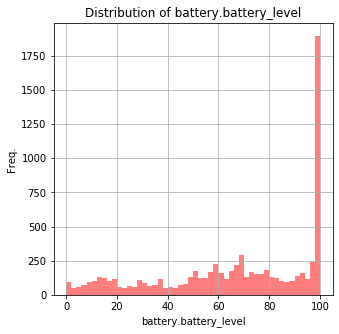

In [12]:
um.plot_hist_distribution(df, 'battery.battery_level')

---

## Calls

### iOS calls

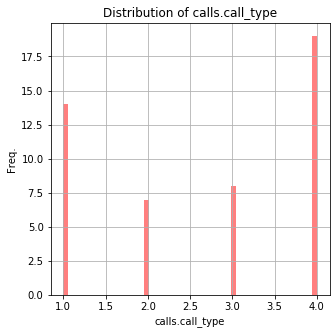

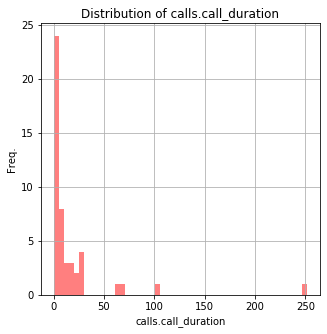

In [13]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], 'calls.call_type')
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], 'calls.call_duration')

### Android calls

<h4 style='color:red'>Android phones are not collecting Calls!!!</h4>

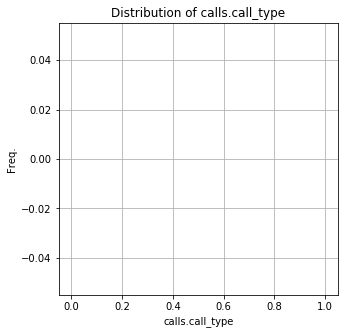

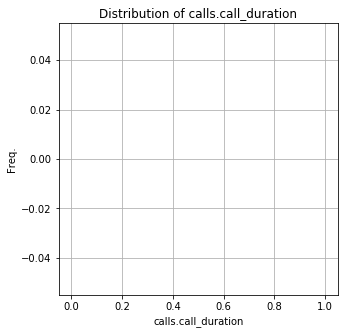

In [14]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], 'calls.call_type')
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], 'calls.call_duration')

---

## Gyroscope

- We have no problem here on mapping, there's one unique table for it and both iOS and Android under the same table **gyroscope**

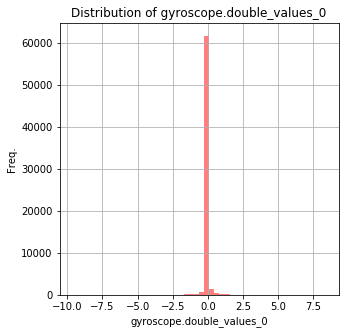

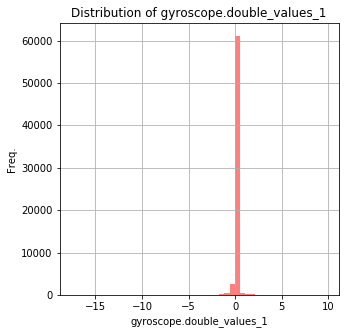

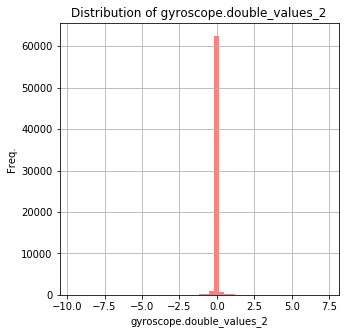

In [15]:
um.plot_hist_distribution(df, 'gyroscope.double_values_0')
um.plot_hist_distribution(df, 'gyroscope.double_values_1')
um.plot_hist_distribution(df, 'gyroscope.double_values_2')

---

## Ambient Noise <span style='color:red'>ANDROID ONLY!</span>

- We have no problem here on mapping, there's one unique table for it and both iOS and Android under the same table **plugin_ambient_noise**

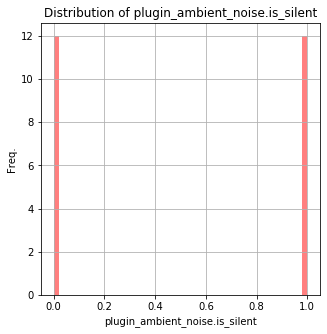

In [16]:
um.plot_hist_distribution(df, 'plugin_ambient_noise.is_silent')

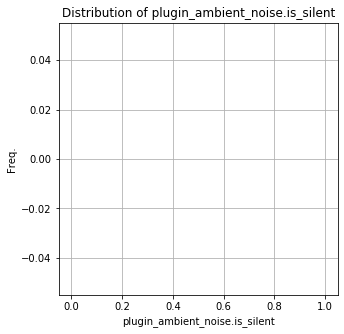

In [17]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], 'plugin_ambient_noise.is_silent')

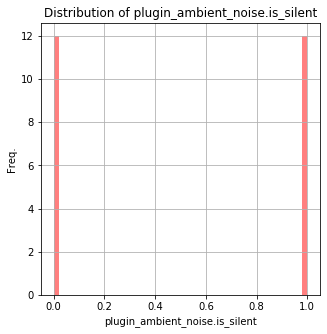

In [18]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], 'plugin_ambient_noise.is_silent')

---

## Plugin Device Usage <span style='color:red'>iOS ONLY!</span>

- We have no problem here on mapping, there's one unique table for it and both iOS and Android under the same table **plugin_device_usage**

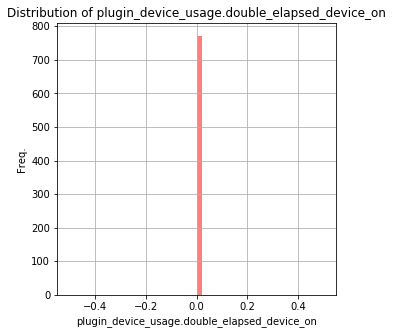

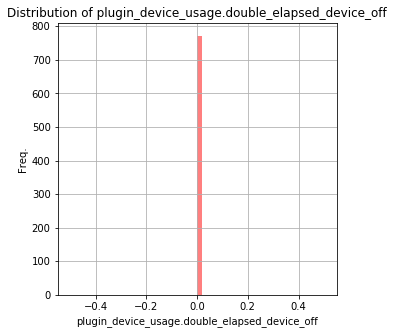

In [19]:
um.plot_hist_distribution(df, 'plugin_device_usage.double_elapsed_device_on')
um.plot_hist_distribution(df, 'plugin_device_usage.double_elapsed_device_off')

- iOS

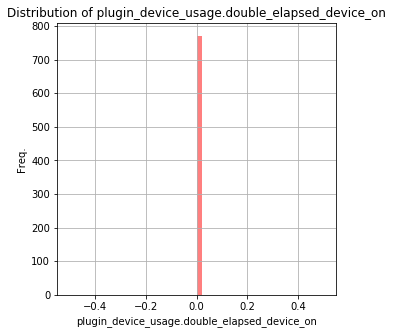

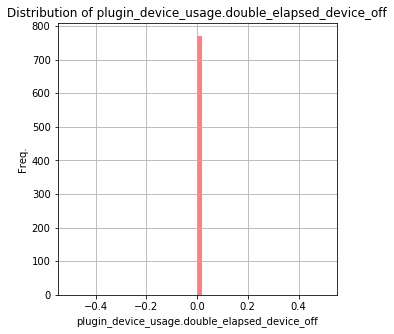

In [20]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], 'plugin_device_usage.double_elapsed_device_on')
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], 'plugin_device_usage.double_elapsed_device_off')

- Android

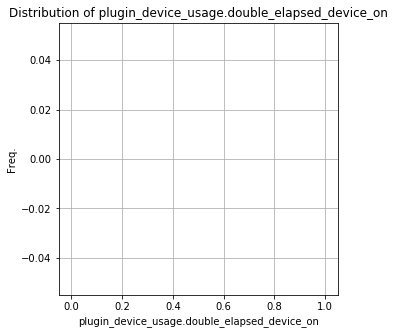

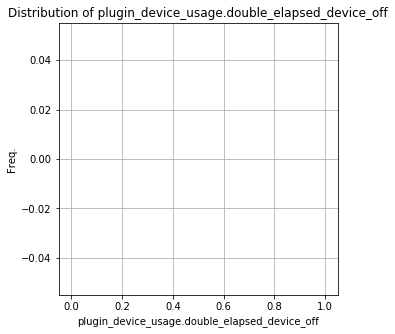

In [21]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], 'plugin_device_usage.double_elapsed_device_on')
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], 'plugin_device_usage.double_elapsed_device_off')

---

## Plugin (iOS/Google) Activity Recognition

In [22]:
activities_map = {
    'stationary': 'stationary',
    'still': 'stationary',
    
    'walking': 'walking',
    'running': 'running',
    
    'cycling': 'cycling',
    'on_bycicle': 'cycling',
    
    'automotive': 'automotive',
    'in_vehicle': 'automotive',
    
    'tilting': np.nan,
    'on_foot': np.nan
}

In [23]:
def parse_activity_json(text):
    if type(text) is str:
        temp = text.replace('"', '').replace('[', '').replace(']', '')
        return activities_map[temp]
    else:
        return text

### plugin_ios_activity_recognition.activities

In [24]:
ios_col = 'plugin_ios_activity_recognition.activities'
df[ios_col].unique()

array([nan, '"["stationary"]"', '"["walking"]"', '"["automotive"]"',
       '"["running"]"', '"["cycling"]"'], dtype=object)

In [25]:
df[ios_col] = df[ios_col].map(parse_activity_json)

In [26]:
pd.DataFrame(df[ios_col].value_counts(dropna=False)).transpose()

NaN  stationary  walking  \
plugin_ios_activity_recognition.activities  63034        6448     1091   

                                            automotive  running  cycling  
plugin_ios_activity_recognition.activities         549        7        1

### plugin_google_activity_recognition.activity_name

In [27]:
android_col = 'plugin_google_activity_recognition.activity_name'
df[android_col].unique()

array([nan, 'still', 'tilting'], dtype=object)

In [28]:
df[android_col] = df[android_col].map(parse_activity_json)

In [29]:
pd.DataFrame(df[android_col].value_counts(dropna=False)).transpose()

NaN  stationary
plugin_google_activity_recognition.activity_name  71120          10

<h2>Create new column <span style='color:green'>plugin_merged_activity_recognition.activity</span></h2>

In [30]:
new_col = 'plugin_merged_activity_recognition.activity'

ios_col = 'plugin_ios_activity_recognition.activities'
android_col = 'plugin_google_activity_recognition.activity_name'

cols_to_merge = [ios_col, android_col]

cols_to_drop.append(ios_col)
cols_to_drop.append(android_col)

cols_to_merge

['plugin_ios_activity_recognition.activities',
 'plugin_google_activity_recognition.activity_name']

In [31]:
def merging_str(row):
    if type(row[ios_col]) is str:
        return row[ios_col]
    else:
        return row[android_col]

In [32]:
df[new_col] = df[cols_to_merge].apply(merging_str, axis=1)
pd.DataFrame(df[new_col].value_counts(dropna=False)).transpose()

NaN  stationary  walking  \
plugin_merged_activity_recognition.activity  63024        6458     1091   

                                             automotive  running  cycling  
plugin_merged_activity_recognition.activity         549        7        1

---

### plugin_ios_activity_recognition.confidence

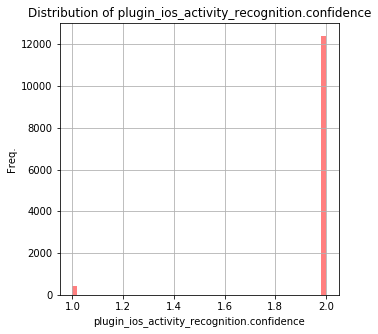

In [33]:
um.plot_hist_distribution(df, 'plugin_ios_activity_recognition.confidence')

In [34]:
activities_confidence_map = {
    '0.0': 'low',
    '1.0': 'medium',
    '2.0': 'high',
}

def activity_map(val):
    if val == 0.0:
        return activities_confidence_map['0.0']
    elif val == 1.0:
        return activities_confidence_map['1.0']
    elif val == 2.0:
        return activities_confidence_map['2.0']
    else:
        return val

In [35]:
df['plugin_ios_activity_recognition.confidence_cat'] = df['plugin_ios_activity_recognition.confidence'].map(activity_map)

cols_to_drop.append('plugin_ios_activity_recognition.confidence')

In [36]:
pd.DataFrame(df['plugin_ios_activity_recognition.confidence_cat'].value_counts(dropna=False)).transpose()

NaN   high  medium
plugin_ios_activity_recognition.confidence_cat  58309  12388     433

### plugin_google_activity_recognition.confidence

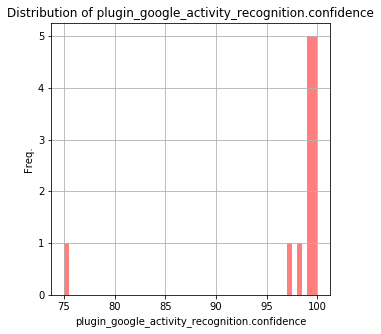

In [37]:
um.plot_hist_distribution(df, 'plugin_google_activity_recognition.confidence')

In [38]:
df['plugin_google_activity_recognition.confidence'].value_counts()

100.0    5
99.0     5
75.0     1
98.0     1
97.0     1
Name: plugin_google_activity_recognition.confidence, dtype: int64

In [39]:
bins = [0.0, 33.0, 66.0, 100.0]
labels = ['low', 'medium', 'high']

pd.cut(df['plugin_google_activity_recognition.confidence'], bins=bins, labels=labels).value_counts()

high      13
medium     0
low        0
Name: plugin_google_activity_recognition.confidence, dtype: int64

In [40]:
df['plugin_google_activity_recognition.confidence_cat'] = pd.cut(df['plugin_google_activity_recognition.confidence'], bins=bins, labels=labels)

cols_to_drop.append('plugin_google_activity_recognition.confidence')

In [41]:
df['plugin_google_activity_recognition.confidence_cat'].value_counts()

high      13
medium     0
low        0
Name: plugin_google_activity_recognition.confidence_cat, dtype: int64

<h2>Create new column <span style='color:green'>plugin_merged_activity_recognition.confidence_cat</span></h2>

In [42]:
new_col = 'plugin_merged_activity_recognition.confidence_cat'

ios_col = 'plugin_ios_activity_recognition.confidence_cat'
android_col = 'plugin_google_activity_recognition.confidence_cat'

cols_to_merge = [ios_col, android_col]
cols_to_merge

['plugin_ios_activity_recognition.confidence_cat',
 'plugin_google_activity_recognition.confidence_cat']

In [43]:
cols_to_drop.append('plugin_ios_activity_recognition.confidence_cat')
cols_to_drop.append('plugin_google_activity_recognition.confidence_cat')

In [44]:
df[new_col] = df[cols_to_merge].apply(merging_str, axis=1)
pd.DataFrame(df[new_col].value_counts(dropna=False)).transpose()

NaN   high  medium
plugin_merged_activity_recognition.confidence_cat  58296  12401     433

---

## OpenWeather

In [45]:
col = 'plugin_openweather.city'
pd.DataFrame(df[col].value_counts(dropna=False)).transpose()

NaN  Hacienda Heights  Avalon  Tainan  Afton  \
plugin_openweather.city  70890               230       4       3      2   

                         Marina del Rey  
plugin_openweather.city               1

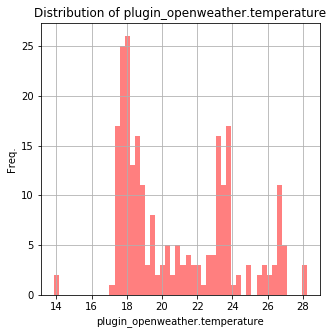

In [46]:
col = 'plugin_openweather.temperature'
um.plot_hist_distribution(df, col)

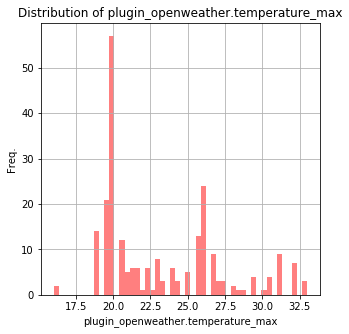

In [47]:
col = 'plugin_openweather.temperature_max'
um.plot_hist_distribution(df, col)

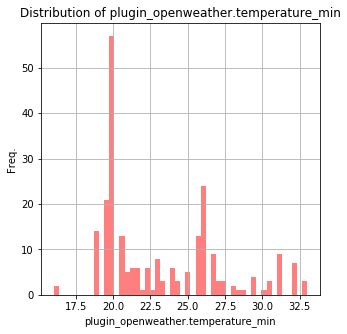

In [48]:
col = 'plugin_openweather.temperature_min'
um.plot_hist_distribution(df, col)

In [49]:
col = 'plugin_openweather.unit'
pd.DataFrame(df[col].value_counts(dropna=False)).transpose()

NaN  metric
plugin_openweather.unit  70890     240

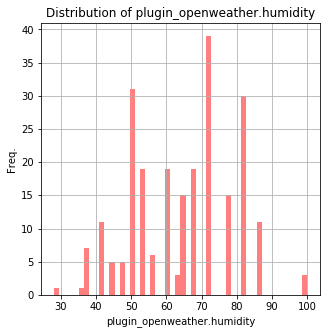

In [50]:
col = 'plugin_openweather.humidity'
um.plot_hist_distribution(df, col)

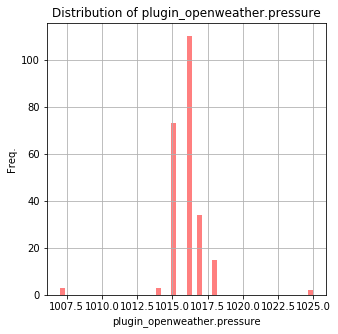

In [51]:
col = 'plugin_openweather.pressure'
um.plot_hist_distribution(df, col)

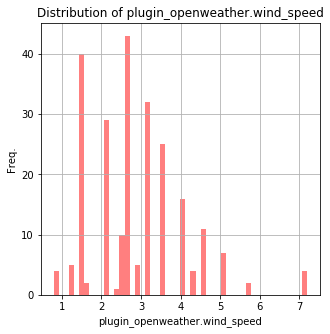

In [52]:
col = 'plugin_openweather.wind_speed'
um.plot_hist_distribution(df, col)

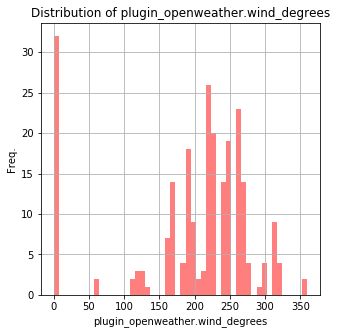

In [53]:
col = 'plugin_openweather.wind_degrees'
um.plot_hist_distribution(df, col)

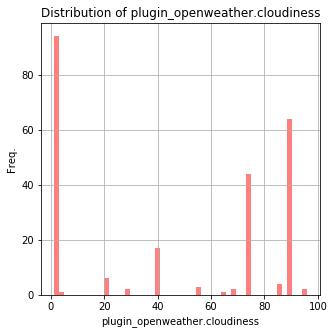

In [54]:
col = 'plugin_openweather.cloudiness'
um.plot_hist_distribution(df, col)

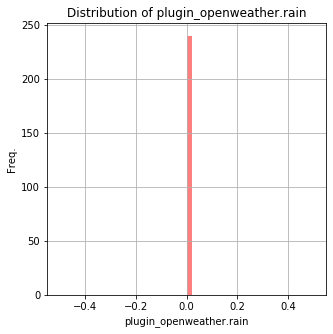

In [55]:
col = 'plugin_openweather.rain'
um.plot_hist_distribution(df, col)

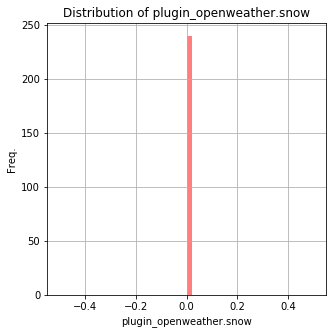

In [56]:
col = 'plugin_openweather.snow'
um.plot_hist_distribution(df, col)

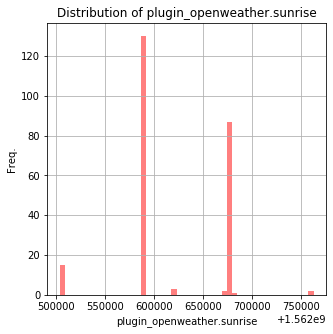

In [57]:
col = 'plugin_openweather.sunrise'
um.plot_hist_distribution(df, col)

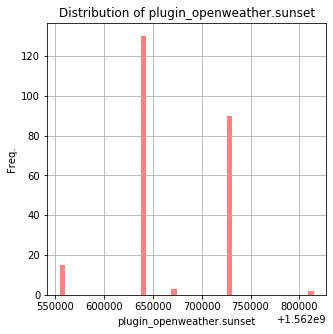

In [58]:
col = 'plugin_openweather.sunset'
um.plot_hist_distribution(df, col)

In [59]:
col = 'plugin_openweather.weather_description'
pd.DataFrame(df[col].value_counts(dropna=False)).transpose()

NaN  clear sky  haze  broken clouds  \
plugin_openweather.weather_description  70890         77    75             36   

                                        overcast clouds  mist  \
plugin_openweather.weather_description               17    14   

                                        scattered clouds  few clouds  \
plugin_openweather.weather_description                11           6   

                                        shower rain  Clouds: scattered clouds  
plugin_openweather.weather_description            3                         1

---

## StudentLife Audio <span style='color:red'>ONLY ANDROID</span>

0 = silence, 1 = noise, 2 = voice, 3 = unknown

- Seems that there is always noise..


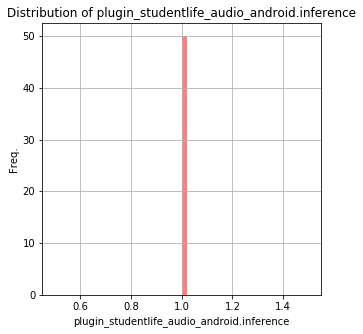

In [60]:
col = 'plugin_studentlife_audio_android.inference'
um.plot_hist_distribution(df, col)

- Is this only Android??

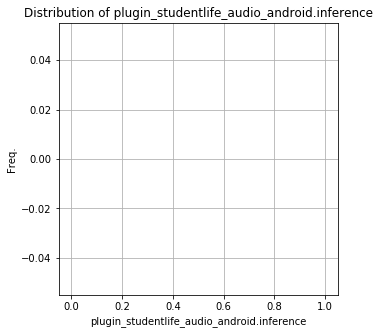

In [61]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_ios)], col)

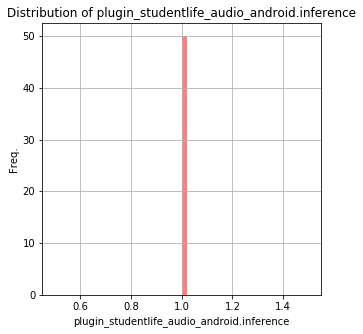

In [62]:
um.plot_hist_distribution( df[df['device_id'].isin(device_ids_android)], col)

---

## Rotation

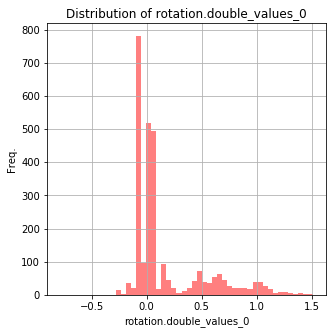

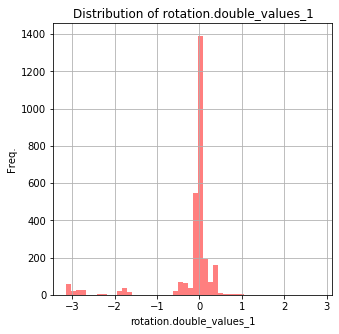

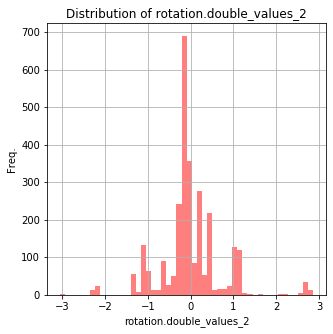

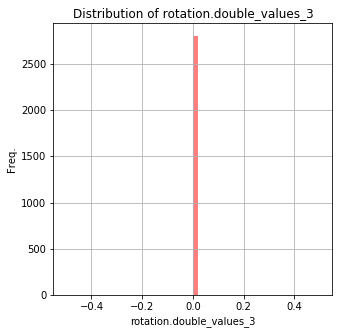

In [63]:
um.plot_hist_distribution(df, 'rotation.double_values_0')
um.plot_hist_distribution(df, 'rotation.double_values_1')
um.plot_hist_distribution(df, 'rotation.double_values_2')
um.plot_hist_distribution(df, 'rotation.double_values_3')

---

## Screen

0=off, 1=on, 2=locked, 3=unlocked

In [64]:
screen_map = {
    0.0: 'off',
    1.0: 'on',
    2.0: 'locked',
    3.0: 'unlocked'
}

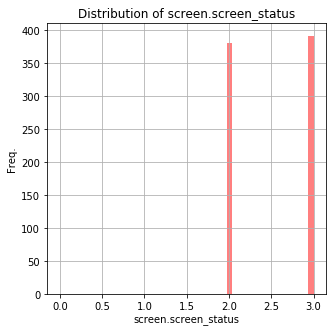

In [65]:
um.plot_hist_distribution(df, 'screen.screen_status')

In [66]:
df['screen.screen_status_cat'] = df['screen.screen_status'].map(screen_map)

In [67]:
pd.DataFrame(df['screen.screen_status_cat'].value_counts(dropna=False)).transpose()

NaN  unlocked  locked  on  off
screen.screen_status_cat  70355       392     381   1    1

In [68]:
cols_to_drop.append('screen.screen_status')

---

## Wifi

In [69]:
def has_wifi(row):
    if type(row) is str:
        return True
    else:
        return False

In [70]:
df['wifi.is_connected'] = df['sensor_wifi.ssid'].map(has_wifi)

In [71]:
df['wifi.is_connected'].value_counts()

False    65487
True      5643
Name: wifi.is_connected, dtype: int64

In [72]:
cols_to_drop.append('sensor_wifi.ssid')

In [73]:
df.shape

(71130, 64)

---

## Final stretch

- Drop unnecessary columns since they were already merged into one column

In [74]:
print('Cols to drop:', len(cols_to_drop))

cols_to_drop

Cols to drop: 8


['plugin_ios_activity_recognition.activities',
 'plugin_google_activity_recognition.activity_name',
 'plugin_ios_activity_recognition.confidence',
 'plugin_google_activity_recognition.confidence',
 'plugin_ios_activity_recognition.confidence_cat',
 'plugin_google_activity_recognition.confidence_cat',
 'screen.screen_status',
 'sensor_wifi.ssid']

In [75]:
outputdf = df.drop(columns=cols_to_drop)

In [76]:
outputdf.shape, df.shape, rawdf.shape

((71130, 56), (71130, 64), (71130, 142))

In [78]:
missings2 = util.summary_missing_data(outputdf)
missings2

Count   Percent
plugin_google_activity_recognition.values_consi...  71117  0.999817
plugin_ambient_noise.is_silent                      71106  0.999663
plugin_ambient_noise.values_considered              71106  0.999663
calls.call_duration                                 71082  0.999325
calls.call_type                                     71082  0.999325
calls.values_considered                             71082  0.999325
plugin_studentlife_audio_android.values_considered  71080  0.999297
plugin_studentlife_audio_android.inference          71080  0.999297
plugin_openweather.city                             70890  0.996626
plugin_openweather.snow                             70890  0.996626
plugin_openweather.temperature                      70890  0.996626
plugin_openweather.sunset                           70890  0.996626
plugin_openweather.sunrise                          70890  0.996626
plugin_openweather.pressure                         70890  0.996626
plugin_openweather.rain                             70890  0.996626
plugin_openweather.temperature_min                  70890  0.996626
plugin_openweather.cloudiness                       70890  0.996626
plugin_openweather.temperature_max                  70890  0.996626
plugin_openweather.humidity                         70890  0.996626
plugin_openweather.unit                             70890  0.996626
plugin_openweather.wind_degrees                     70890  0.996626
plugin_openweather.wind_speed                       70890  0.996626
plugin_openweather.values_considered                70890  0.996626
plugin_openweather.weather_description              70890  0.996626
plugin_device_usage.values_considered               70359  0.989161
plugin_device_usage.double_elapsed_device_on        70359  0.989161
plugin_device_usage.double_elapsed_device_off       70359  0.989161
screen.values_considered                            70355  0.989104
screen.screen_status_cat                            70355  0.989104
rotation.double_values_0                            68327  0.960593
rotation.double_values_1                            68327  0.960593
rotation.double_values_2                            68327  0.960593
rotation.double_values_3                            68327  0.960593
rotation.values_considered                          68327  0.960593
linear_accelerometer.double_values_0                68326  0.960579
linear_accelerometer.double_values_2                68326  0.960579
linear_accelerometer.double_values_1                68326  0.960579
linear_accelerometer.values_considered              68326  0.960579
sensor_wifi.values_considered                       64189  0.902418
battery.values_considered                           63378  0.891016
battery.battery_level                               63378  0.891016
plugin_merged_activity_recognition.activity         63024  0.886040
plugin_ios_activity_recognition.values_considered   58309  0.819753
plugin_merged_activity_recognition.confidence_cat   58296  0.819570
gyroscope.values_considered                          5789  0.081386
gyroscope.double_values_2                            5789  0.081386
gyroscope.double_values_1                            5789  0.081386
gyroscope.double_values_0                            5789  0.081386
accelerometer.values_considered                      5637  0.079249
accelerometer.double_values_2                        5637  0.079249
accelerometer.double_values_1                        5637  0.079249
accelerometer.double_values_0                        5637  0.079249

In [77]:
outputdf.to_csv(filename+'-Merged.csv')